In [191]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate, train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVR
# Setting random seed to get reproducible runs
RSEED = 100

# Part 1: Data Processing

In [64]:
data = pd.read_csv("factorsCancerPerCounty.csv")

C:\Users\Owner\Miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [65]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [66]:
data.columns

Index(['locale', 'fips', 'annual_count_avg', 'areatype', 'cancer', 'stateFIPS',
       'state', 'cancer_description', 'ACID', 'ENRG', 'ETOX', 'EUTR', 'FOOD',
       'GCC', 'HAPS', 'HAZW', 'HC', 'HNC', 'HRSP', 'HTOX', 'JOBS', 'LAND',
       'METL', 'MINE', 'MSW', 'NREN', 'OZON', 'PEST', 'REN', 'SMOG', 'VADD',
       'WATR'],
      dtype='object')

In [98]:
factors=np.array(['ACID', 'ENRG', 'ETOX', 'EUTR', 'FOOD',
       'GCC', 'HAPS', 'HAZW', 'HC', 'HNC', 'HRSP', 'HTOX', 'JOBS', 'LAND',
       'METL', 'MINE', 'MSW', 'NREN', 'OZON', 'PEST', 'REN', 'SMOG', 'VADD',
       'WATR'])

In [67]:
data

,locale,fips,annual_count_avg,areatype,cancer,stateFIPS,state,cancer_description,ACID,ENRG,...,METL,MINE,MSW,NREN,OZON,PEST,REN,SMOG,VADD,WATR
0,"Autauga County(6,10)",1001,304,county,1,1,alabama,All Cancer Sites,299.152569,728644.544118,...,0.050200,0.000000,2149.369209,435169.166702,0.002923,0.034974,293475.377416,2949.632736,79914.159702,7851.498268
1,"Autauga County(6,10)",1001,8,county,3,1,alabama,Oral Cavity & Pharynx,299.152569,728644.544118,...,0.050200,0.000000,2149.369209,435169.166702,0.002923,0.034974,293475.377416,2949.632736,79914.159702,7851.498268
2,"Autauga County(6,10)",1001,3,county,17,1,alabama,Esophagus,299.152569,728644.544118,...,0.050200,0.000000,2149.369209,435169.166702,0.002923,0.034974,293475.377416,2949.632736,79914.159702,7851.498268
3,"Autauga County(6,10)",1001,6,county,18,1,alabama,Stomach,299.152569,728644.544118,...,0.050200,0.000000,2149.369209,435169.166702,0.002923,0.034974,293475.377416,2949.632736,79914.159702,7851.498268
4,"Autauga County(6,10)",1001,32,county,20,1,alabama,Colon & Rectum,299.152569,728644.544118,...,0.050200,0.000000,2149.369209,435169.166702,0.002923,0.034974,293475.377416,2949.632736,79914.159702,7851.498268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72054,"Weston County(6,10)",56045,3,county,86,56,wyoming,Non-Hodgkin Lymphoma,34.618906,428737.854052,...,0.000817,17113.628433,348.003649,428660.792817,0.000395,0.000943,77.061234,1321.995548,12995.136488,47.904143
72055,"Weston County(6,10)",56045,3,county,90,56,wyoming,Leukemia,34.618906,428737.854052,...,0.000817,17113.628433,348.003649,428660.792817,0.000395,0.000943,77.061234,1321.995548,12995.136488,47.904143
72056,"Weston County(6,10)",56045,3,county,400,56,wyoming,Breast (in situ) (Female),34.618906,428737.854052,...,0.000817,17113.628433,348.003649,428660.792817,0.000395,0.000943,77.061234,1321.995548,12995.136488,47.904143
72057,"Weston County(6,10)",56045,3,county,515,56,wyoming,"Childhood (Ages <20, All Sites)",34.618906,428737.854052,...,0.000817,17113.628433,348.003649,428660.792817,0.000395,0.000943,77.061234,1321.995548,12995.136488,47.904143


In [69]:
print(data.dtypes)
data['annual_count_avg'].replace({r'[^\x00-\x7F]+':'0'}, regex=True, inplace=True)
data['annual_count_avg'] = data['annual_count_avg'].astype("float64")

locale                 object
fips                    int64
annual_count_avg       object
areatype               object
cancer                  int64
stateFIPS               int64
state                  object
cancer_description     object
ACID                  float64
ENRG                  float64
ETOX                  float64
EUTR                  float64
FOOD                  float64
GCC                   float64
HAPS                  float64
HAZW                  float64
HC                    float64
HNC                   float64
HRSP                  float64
HTOX                  float64
JOBS                  float64
LAND                  float64
METL                  float64
MINE                  float64
MSW                   float64
NREN                  float64
OZON                  float64
PEST                  float64
REN                   float64
SMOG                  float64
VADD                  float64
WATR                  float64
dtype: object


In [70]:
cancerVals=data["cancer"].unique()
cancerVals

array([  1,   3,  17,  18,  20,  35,  40,  47,  53,  55,  57,  58,  61,
        66,  71,  72,  76,  80,  86,  90, 400, 515, 516], dtype=int64)

In [71]:
cancerDescr=data["cancer_description"].unique()
cancerDescr

array(['All Cancer Sites', 'Oral Cavity & Pharynx', 'Esophagus',
       'Stomach', 'Colon & Rectum', 'Liver & Bile Duct', 'Pancreas',
       'Lung & Bronchus', 'Melanoma of the Skin', 'Breast (Female)',
       'Cervix (Female)', 'Uterus (Corpus & Uterus, NOS) (Female)',
       'Ovary (Female)', 'Prostate (Male)', 'Bladder',
       'Kidney & Renal Pelvis', 'Brain & ONS', 'Thyroid',
       'Non-Hodgkin Lymphoma', 'Leukemia', 'Breast (in situ) (Female)',
       'Childhood (Ages <20, All Sites)',
       'Childhood (Ages <15, All Sites)'], dtype=object)

In [155]:
cancerDescription=data[["cancer","cancer_description"]]
cancerTypes=cancerDescription.groupby(["cancer","cancer_description"]).sum().reset_index()
print(cancerTypes)
cancer=cancerTypes["cancer"]==3
print("example:")
print(cancerTypes[cancer]["cancer_description"].to_string())

    cancer                      cancer_description
0        1                        All Cancer Sites
1        3                   Oral Cavity & Pharynx
2       17                               Esophagus
3       18                                 Stomach
4       20                          Colon & Rectum
5       35                       Liver & Bile Duct
6       40                                Pancreas
7       47                         Lung & Bronchus
8       53                    Melanoma of the Skin
9       55                         Breast (Female)
10      57                         Cervix (Female)
11      58  Uterus (Corpus & Uterus, NOS) (Female)
12      61                          Ovary (Female)
13      66                         Prostate (Male)
14      71                                 Bladder
15      72                   Kidney & Renal Pelvis
16      76                             Brain & ONS
17      80                                 Thyroid
18      86                    N

# Part 2: Random Forest Regressor

## Hypertuning

In [180]:
cancerData=data["cancer"]==1
newData=data[cancerData]    

#splitting to test and train
x1=newData.loc[:, 'ACID':'WATR']
y = newData['annual_count_avg']

X_train1, X_test1, y_train, y_test = train_test_split(x1, y,
                                                    test_size=0.3,
                                                    random_state = RSEED)
scaler = StandardScaler()
scaler.fit(X_train1)

X_train = scaler.transform(X_train1)
X_test = scaler.transform(X_test1)

print("XTrain",X_train.shape)
print("XTest",X_test.shape)

XTrain (2193, 24)
XTest (940, 24)


In [ ]:
# Create the model with 10 trees
#regressor = RandomForestRegressor(n_estimators = 100,
                                 # random_state = RSEED)

# Fit on training data
#regressor.fit(X_train, y_train)

parameters={'n_estimators':[4, 16,32,50,64,100,128, 256],'max_depth': [2, 8, 16,32,50,64]}
rf = RandomForestRegressor(random_state = RSEED)
clf = GridSearchCV(rf, parameters)
clf.fit(X_train, y_train)

In [ ]:
print(clf.best_params_)

## Random Forest Loop

cancer type: 1
0    All Cancer Sites
Creating RandomForest Model and Fitting the Data
score 0.8819687210387928
Feature Importance
indecis: [ 4 16 14 18 12 22  3  7  6 11  2 19  0 17 15 20  1 13 10  5 23  8 21  9]
importances: [0.53490404 0.11591872 0.0820623  0.06413346 0.03011724 0.02448188
 0.02411051 0.01910172 0.01882702 0.01600346 0.01248373 0.01176378
 0.01026421 0.00522996 0.00509087 0.0045648  0.00420603 0.0036281
 0.00340355 0.00254425 0.00231281 0.00210026 0.00208105 0.00066626]
features: ['FOOD' 'MSW' 'METL' 'OZON' 'JOBS' 'VADD' 'EUTR' 'HAZW' 'HAPS' 'HTOX'
 'ETOX' 'PEST' 'ACID' 'NREN' 'MINE' 'REN' 'ENRG' 'LAND' 'HRSP' 'GCC'
 'WATR' 'HC' 'SMOG' 'HNC']


cancer type: 3
1    Oral Cavity & Pharynx
Creating RandomForest Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\ipykernel_launcher.py:60: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


score 0.8758564756373749
Feature Importance
indecis: [ 4 16 18  6 14 22  3  2 10  7 12 11  8 19  5 17 15  1 20 13  0 23 21  9]
importances: [0.53450614 0.15741434 0.05873836 0.04871986 0.04333129 0.02500536
 0.02423856 0.01678462 0.01228034 0.0110564  0.00972783 0.00971953
 0.00836054 0.00685098 0.00502185 0.00486844 0.00420986 0.00390055
 0.00374622 0.00342021 0.00290556 0.00248078 0.00177137 0.00094103]
features: ['FOOD' 'MSW' 'OZON' 'HAPS' 'METL' 'VADD' 'EUTR' 'ETOX' 'HRSP' 'HAZW'
 'JOBS' 'HTOX' 'HC' 'PEST' 'GCC' 'NREN' 'MINE' 'ENRG' 'REN' 'LAND' 'ACID'
 'WATR' 'SMOG' 'HNC']


cancer type: 17
2    Esophagus
Creating RandomForest Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\ipykernel_launcher.py:60: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


score 0.8152024048835163
Feature Importance
indecis: [ 4 16 14 10 22 18 12  6  3  8 11  5  9 15  2  7 17 20 19 13  0 21 23  1]
importances: [0.54201492 0.10578857 0.06608228 0.03583555 0.03535785 0.0347759
 0.0314871  0.02556283 0.02262223 0.01708537 0.01082988 0.00925631
 0.00833242 0.00789605 0.00761597 0.00700683 0.00661825 0.00546382
 0.00448364 0.00432695 0.00357863 0.0033031  0.00237529 0.00230024]
features: ['FOOD' 'MSW' 'METL' 'HRSP' 'VADD' 'OZON' 'JOBS' 'HAPS' 'EUTR' 'HC' 'HTOX'
 'GCC' 'HNC' 'MINE' 'ETOX' 'HAZW' 'NREN' 'REN' 'PEST' 'LAND' 'ACID' 'SMOG'
 'WATR' 'ENRG']


cancer type: 18
3    Stomach
Creating RandomForest Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\ipykernel_launcher.py:60: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


score 0.849464813706331
Feature Importance
indecis: [ 4 12 16  3 18 14 22  5 10  6  9  7 21  1  2 19  8 23 17 13 15 20  0 11]
importances: [0.22353621 0.1939082  0.12096731 0.0976474  0.08678339 0.07797725
 0.05547445 0.02745838 0.02106266 0.01999722 0.01810137 0.00955761
 0.0081886  0.00750831 0.0063349  0.00413509 0.00369347 0.00366273
 0.00357013 0.00297051 0.00284036 0.00278959 0.00132937 0.00050548]
features: ['FOOD' 'JOBS' 'MSW' 'EUTR' 'OZON' 'METL' 'VADD' 'GCC' 'HRSP' 'HAPS' 'HNC'
 'HAZW' 'SMOG' 'ENRG' 'ETOX' 'PEST' 'HC' 'WATR' 'NREN' 'LAND' 'MINE' 'REN'
 'ACID' 'HTOX']


cancer type: 20
4    Colon & Rectum
Creating RandomForest Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\ipykernel_launcher.py:60: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


score 0.8471980024181344
Feature Importance
indecis: [ 4 16 18 14 10  9 12  3 22  6 11 19  2  7  1 15 20 17  5  0 21  8 13 23]
importances: [0.43371001 0.1162898  0.08911767 0.06853543 0.04212088 0.03853192
 0.03738027 0.03555587 0.03505335 0.02957482 0.01799729 0.01572797
 0.00694526 0.00564819 0.00433604 0.00385782 0.00333153 0.00303781
 0.00300976 0.00273517 0.00224118 0.0018495  0.001761   0.00165146]
features: ['FOOD' 'MSW' 'OZON' 'METL' 'HRSP' 'HNC' 'JOBS' 'EUTR' 'VADD' 'HAPS'
 'HTOX' 'PEST' 'ETOX' 'HAZW' 'ENRG' 'MINE' 'REN' 'NREN' 'GCC' 'ACID'
 'SMOG' 'HC' 'LAND' 'WATR']


cancer type: 35
5    Liver & Bile Duct
Creating RandomForest Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\ipykernel_launcher.py:60: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


score 0.8385184914578491
Feature Importance
indecis: [ 4 14 12 18 16 22  8  3  9 10  0  1  6 21 19 17  2  7  5 11 20 15 13 23]
importances: [0.41625946 0.1159245  0.11433382 0.07260107 0.06368553 0.05059003
 0.01983907 0.01815154 0.01636036 0.0161244  0.01396619 0.00983169
 0.00983159 0.00945038 0.00934999 0.00863131 0.00790973 0.00554898
 0.00537732 0.00450285 0.00364005 0.00285124 0.00265298 0.00258591]
features: ['FOOD' 'METL' 'JOBS' 'OZON' 'MSW' 'VADD' 'HC' 'EUTR' 'HNC' 'HRSP' 'ACID'
 'ENRG' 'HAPS' 'SMOG' 'PEST' 'NREN' 'ETOX' 'HAZW' 'GCC' 'HTOX' 'REN'
 'MINE' 'LAND' 'WATR']


cancer type: 40
6    Pancreas
Creating RandomForest Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\ipykernel_launcher.py:60: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


score 0.8418035577902212
Feature Importance
indecis: [ 4 16 14 12  3 18 22  9 19  7  8 10 11  5  2  6 13 20 23 15  1  0 17 21]
importances: [0.44188374 0.11526283 0.10509788 0.06175875 0.04621004 0.04332804
 0.03371238 0.02874648 0.02373899 0.01448801 0.01204447 0.01178413
 0.01114612 0.01106643 0.01026751 0.00691609 0.00443865 0.00382107
 0.0030282  0.00290874 0.00269706 0.00216879 0.00211245 0.00137315]
features: ['FOOD' 'MSW' 'METL' 'JOBS' 'EUTR' 'OZON' 'VADD' 'HNC' 'PEST' 'HAZW' 'HC'
 'HRSP' 'HTOX' 'GCC' 'ETOX' 'HAPS' 'LAND' 'REN' 'WATR' 'MINE' 'ENRG'
 'ACID' 'NREN' 'SMOG']


cancer type: 47
7    Lung & Bronchus
Creating RandomForest Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\ipykernel_launcher.py:60: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


score 0.8106591169995
Feature Importance
indecis: [ 4 16 14  6 18 22 12  3 10  9  7 21 17  1  8  2 15 19 20 23 13  0  5 11]
importances: [0.45347092 0.19674917 0.0797479  0.05404369 0.03804975 0.02779223
 0.02704136 0.01844722 0.01628162 0.01504917 0.01027846 0.0076594
 0.0076587  0.00632567 0.00628648 0.00588088 0.00584104 0.00491495
 0.00475993 0.00395111 0.00338155 0.00299431 0.00211136 0.00128312]
features: ['FOOD' 'MSW' 'METL' 'HAPS' 'OZON' 'VADD' 'JOBS' 'EUTR' 'HRSP' 'HNC'
 'HAZW' 'SMOG' 'NREN' 'ENRG' 'HC' 'ETOX' 'MINE' 'PEST' 'REN' 'WATR' 'LAND'
 'ACID' 'GCC' 'HTOX']


cancer type: 53
8    Melanoma of the Skin
Creating RandomForest Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\ipykernel_launcher.py:60: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


score 0.8285368793721613
Feature Importance
indecis: [ 4  2 16 19 18  3  7 14 22  6 12 23 15 20 13  1 10  0  5 17 21  9  8 11]
importances: [0.56698275 0.08374635 0.06247443 0.05450958 0.04383384 0.03326534
 0.02125625 0.02120097 0.02099811 0.01968633 0.01420182 0.01154203
 0.00734212 0.00720499 0.00543349 0.00464777 0.00412179 0.00375558
 0.00355774 0.00273162 0.00268465 0.00253192 0.00139118 0.00089933]
features: ['FOOD' 'ETOX' 'MSW' 'PEST' 'OZON' 'EUTR' 'HAZW' 'METL' 'VADD' 'HAPS'
 'JOBS' 'WATR' 'MINE' 'REN' 'LAND' 'ENRG' 'HRSP' 'ACID' 'GCC' 'NREN'
 'SMOG' 'HNC' 'HC' 'HTOX']


cancer type: 55
9    Breast (Female)
Creating RandomForest Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\ipykernel_launcher.py:60: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


score 0.9068670360693758
Feature Importance
indecis: [ 4 16 18 12  3 14 22  6  2 19  0 10  7  5 17 13  8 20 15 23  1 11 21  9]
importances: [0.4880163  0.11487587 0.0731649  0.06722081 0.05494756 0.05372273
 0.0448191  0.02654748 0.01970919 0.01206048 0.01065374 0.00622012
 0.00596477 0.00492986 0.00318938 0.00262511 0.00249813 0.00191189
 0.00187371 0.00121688 0.00120828 0.00112842 0.00078087 0.00071441]
features: ['FOOD' 'MSW' 'OZON' 'JOBS' 'EUTR' 'METL' 'VADD' 'HAPS' 'ETOX' 'PEST'
 'ACID' 'HRSP' 'HAZW' 'GCC' 'NREN' 'LAND' 'HC' 'REN' 'MINE' 'WATR' 'ENRG'
 'HTOX' 'SMOG' 'HNC']


cancer type: 57
10    Cervix (Female)
Creating RandomForest Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\ipykernel_launcher.py:60: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


score 0.754588090255887
Feature Importance
indecis: [ 4 14 12 18  9  3 16 22  5  0 17 11  6  8  7 10 13 20 15 23  1 19 21  2]
importances: [0.27804088 0.12456036 0.10080031 0.08718777 0.07980681 0.05032971
 0.04871003 0.04032521 0.02555735 0.02487443 0.02465976 0.02364886
 0.01824629 0.01425964 0.01374963 0.01209313 0.00979127 0.00669028
 0.00460012 0.00424877 0.00213071 0.00212625 0.00178621 0.00177622]
features: ['FOOD' 'METL' 'JOBS' 'OZON' 'HNC' 'EUTR' 'MSW' 'VADD' 'GCC' 'ACID' 'NREN'
 'HTOX' 'HAPS' 'HC' 'HAZW' 'HRSP' 'LAND' 'REN' 'MINE' 'WATR' 'ENRG' 'PEST'
 'SMOG' 'ETOX']


cancer type: 58
11    Uterus (Corpus & Uterus, NOS) (Female)
Creating RandomForest Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\ipykernel_launcher.py:60: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


score 0.8828842335020907
Feature Importance
indecis: [ 4 16 14 12 22  3 18 21 19  2  8  7  6 10 11 17 23 15  1  5  9 20 13  0]
importances: [0.43590258 0.10245452 0.08721239 0.07630888 0.06666756 0.05865754
 0.05622009 0.01430692 0.01428013 0.01418597 0.01236321 0.012059
 0.0106027  0.00835087 0.00536987 0.0048825  0.00407069 0.00395547
 0.00283079 0.00277525 0.00185877 0.00173825 0.00149587 0.00145018]
features: ['FOOD' 'MSW' 'METL' 'JOBS' 'VADD' 'EUTR' 'OZON' 'SMOG' 'PEST' 'ETOX' 'HC'
 'HAZW' 'HAPS' 'HRSP' 'HTOX' 'NREN' 'WATR' 'MINE' 'ENRG' 'GCC' 'HNC' 'REN'
 'LAND' 'ACID']


cancer type: 61
12    Ovary (Female)
Creating RandomForest Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\ipykernel_launcher.py:60: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


score 0.8580431922392132
Feature Importance
indecis: [ 4 18 16 14 22 12  3  9  5  8  7  6  2 19 10 20  0  1 15 13 23 21 17 11]
importances: [0.43740765 0.12809795 0.09416146 0.06863729 0.05948271 0.04131013
 0.03001224 0.02078779 0.01929599 0.01703705 0.01588929 0.01440437
 0.01177658 0.00991565 0.00736884 0.00558846 0.00388069 0.00319401
 0.0030029  0.0021129  0.00207301 0.00176442 0.00144657 0.00135205]
features: ['FOOD' 'OZON' 'MSW' 'METL' 'VADD' 'JOBS' 'EUTR' 'HNC' 'GCC' 'HC' 'HAZW'
 'HAPS' 'ETOX' 'PEST' 'HRSP' 'REN' 'ACID' 'ENRG' 'MINE' 'LAND' 'WATR'
 'SMOG' 'NREN' 'HTOX']


cancer type: 66
13    Prostate (Male)
Creating RandomForest Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\ipykernel_launcher.py:60: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


score 0.8890921186839258
Feature Importance
indecis: [ 4 16 14 12 18 22  3  6  2 11  8 17  7  1 10 19 20  5 15  9  0 21 23 13]
importances: [0.47726681 0.11432342 0.08495119 0.075463   0.04652379 0.04249969
 0.04236086 0.02217718 0.01710813 0.01546033 0.01467508 0.00810877
 0.00757796 0.004926   0.00469198 0.00409499 0.00336974 0.00296421
 0.00291503 0.00205419 0.00203212 0.00172207 0.0015004  0.00123305]
features: ['FOOD' 'MSW' 'METL' 'JOBS' 'OZON' 'VADD' 'EUTR' 'HAPS' 'ETOX' 'HTOX' 'HC'
 'NREN' 'HAZW' 'ENRG' 'HRSP' 'PEST' 'REN' 'GCC' 'MINE' 'HNC' 'ACID' 'SMOG'
 'WATR' 'LAND']


cancer type: 71
14    Bladder
Creating RandomForest Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\ipykernel_launcher.py:60: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


score 0.8112243194021053
Feature Importance
indecis: [ 4 16 22 18 12 19 14  3 11  6 10  2  7  9 17 20  1 15  5 23  8 13 21  0]
importances: [0.45084778 0.21500985 0.04757335 0.04588356 0.02972138 0.02923274
 0.0273392  0.02517186 0.01814738 0.01746689 0.01635393 0.01559711
 0.01215875 0.00880958 0.00679406 0.0056984  0.0047557  0.0046588
 0.00361267 0.00354258 0.00351988 0.00328733 0.00293331 0.00188392]
features: ['FOOD' 'MSW' 'VADD' 'OZON' 'JOBS' 'PEST' 'METL' 'EUTR' 'HTOX' 'HAPS'
 'HRSP' 'ETOX' 'HAZW' 'HNC' 'NREN' 'REN' 'ENRG' 'MINE' 'GCC' 'WATR' 'HC'
 'LAND' 'SMOG' 'ACID']


cancer type: 72
15    Kidney & Renal Pelvis
Creating RandomForest Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\ipykernel_launcher.py:60: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


score 0.8333744990202927
Feature Importance
indecis: [ 4 16 14 18  3 12 22  6  9 10  7 11  2  8 19  5 15 20 13  1 23 17  0 21]
importances: [0.4430514  0.12651371 0.0651587  0.0611461  0.05915794 0.0445963
 0.0403703  0.03107726 0.02682605 0.01781524 0.01557315 0.01491824
 0.01335129 0.01021769 0.00484353 0.00465354 0.00403493 0.00314515
 0.00307259 0.00292928 0.00252985 0.00232129 0.00171893 0.00097755]
features: ['FOOD' 'MSW' 'METL' 'OZON' 'EUTR' 'JOBS' 'VADD' 'HAPS' 'HNC' 'HRSP'
 'HAZW' 'HTOX' 'ETOX' 'HC' 'PEST' 'GCC' 'MINE' 'REN' 'LAND' 'ENRG' 'WATR'
 'NREN' 'ACID' 'SMOG']


cancer type: 76
16    Brain & ONS
Creating RandomForest Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\ipykernel_launcher.py:60: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


score 0.8727688868910078
Feature Importance
indecis: [ 4 16 18 14  6 22  3 10  7 12  2  8 19 13 20 15  9 11 23  0  5  1 17 21]
importances: [0.52135651 0.14082315 0.08088168 0.05617588 0.041578   0.03348525
 0.0247554  0.01977218 0.01647384 0.01219049 0.01073084 0.00924115
 0.0084461  0.0045518  0.00417244 0.00397258 0.00310173 0.00140827
 0.00136809 0.00126444 0.00123493 0.0011647  0.00095796 0.0008926 ]
features: ['FOOD' 'MSW' 'OZON' 'METL' 'HAPS' 'VADD' 'EUTR' 'HRSP' 'HAZW' 'JOBS'
 'ETOX' 'HC' 'PEST' 'LAND' 'REN' 'MINE' 'HNC' 'HTOX' 'WATR' 'ACID' 'GCC'
 'ENRG' 'NREN' 'SMOG']


cancer type: 80
17    Thyroid
Creating RandomForest Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\ipykernel_launcher.py:60: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


score 0.7653499783233767
Feature Importance
indecis: [ 4 12 16 22 14 18 19  2 10  5  3  7 15 13  6 17 21 11 23  1  8  9 20  0]
importances: [0.44680257 0.12858782 0.11079102 0.06852824 0.06789986 0.04299037
 0.02416086 0.02297506 0.01761087 0.01289908 0.01186018 0.00819669
 0.00572735 0.00542298 0.00342771 0.00338705 0.00337246 0.00301432
 0.00274153 0.00262345 0.00234456 0.00208414 0.00133931 0.00121251]
features: ['FOOD' 'JOBS' 'MSW' 'VADD' 'METL' 'OZON' 'PEST' 'ETOX' 'HRSP' 'GCC'
 'EUTR' 'HAZW' 'MINE' 'LAND' 'HAPS' 'NREN' 'SMOG' 'HTOX' 'WATR' 'ENRG'
 'HC' 'HNC' 'REN' 'ACID']


cancer type: 86
18    Non-Hodgkin Lymphoma
Creating RandomForest Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\ipykernel_launcher.py:60: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


score 0.8561623267150786
Feature Importance
indecis: [ 4 16 14 12 18 19 22  2  8  3 10  6 11  7 15  1 17 13 23 20  9 21  0  5]
importances: [0.47099763 0.09553903 0.08406918 0.07007467 0.05232678 0.04507702
 0.04387238 0.03605413 0.01950503 0.01823566 0.01280464 0.0122121
 0.01150533 0.00582231 0.00400504 0.00255541 0.00254422 0.00249053
 0.00226421 0.00221489 0.00216297 0.00125239 0.00121288 0.00120156]
features: ['FOOD' 'MSW' 'METL' 'JOBS' 'OZON' 'PEST' 'VADD' 'ETOX' 'HC' 'EUTR' 'HRSP'
 'HAPS' 'HTOX' 'HAZW' 'MINE' 'ENRG' 'NREN' 'LAND' 'WATR' 'REN' 'HNC'
 'SMOG' 'ACID' 'GCC']


cancer type: 90
19    Leukemia
Creating RandomForest Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\ipykernel_launcher.py:60: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


score 0.8188287613006758
Feature Importance
indecis: [ 4 16 14 18 12  2 19  3 22  8 10  7 13  1 15  6 11 20  9  0 23 17  5 21]
importances: [0.48947756 0.11181785 0.09251049 0.06171903 0.05288553 0.03214416
 0.03062619 0.02762761 0.02728035 0.01251434 0.00857444 0.00857442
 0.00846795 0.00544435 0.00517527 0.00464827 0.00388679 0.00353783
 0.0031237  0.00254497 0.00248258 0.00188201 0.00154025 0.00151408]
features: ['FOOD' 'MSW' 'METL' 'OZON' 'JOBS' 'ETOX' 'PEST' 'EUTR' 'VADD' 'HC' 'HRSP'
 'HAZW' 'LAND' 'ENRG' 'MINE' 'HAPS' 'HTOX' 'REN' 'HNC' 'ACID' 'WATR'
 'NREN' 'GCC' 'SMOG']


cancer type: 400
20    Breast (in situ) (Female)
Creating RandomForest Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\ipykernel_launcher.py:60: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


score 0.9164076716997492
Feature Importance
indecis: [ 4 12 16 14 22  3 18  6  2  9 19 10 17  7  5 13  1 15 20  8  0 23 11 21]
importances: [0.4515971  0.19554934 0.09253723 0.06314175 0.03385007 0.0311775
 0.03026832 0.01978792 0.01665725 0.00991471 0.00964992 0.00936219
 0.00611734 0.00586396 0.00481695 0.00319933 0.00286554 0.00238619
 0.0023626  0.00205893 0.00184347 0.00177694 0.00165842 0.00155705]
features: ['FOOD' 'JOBS' 'MSW' 'METL' 'VADD' 'EUTR' 'OZON' 'HAPS' 'ETOX' 'HNC'
 'PEST' 'HRSP' 'NREN' 'HAZW' 'GCC' 'LAND' 'ENRG' 'MINE' 'REN' 'HC' 'ACID'
 'WATR' 'HTOX' 'SMOG']


cancer type: 515
21    Childhood (Ages <20, All Sites)
Creating RandomForest Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\ipykernel_launcher.py:53: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\Owner\Miniconda3\lib\site-packages\ipykernel_launcher.py:60: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


score 0.8462587542850576
Feature Importance
indecis: [ 4 18 12 16  7  9 22  6 14  8  3  5 10 19 13  2 17 11 21  0 23 15  1 20]
importances: [0.36354125 0.13132248 0.08051119 0.07108568 0.04752848 0.04289443
 0.03880568 0.03690618 0.03405801 0.03217665 0.03189623 0.03120736
 0.01219195 0.00776623 0.00606483 0.00545301 0.00475597 0.00455404
 0.00405145 0.00343452 0.00323904 0.00258071 0.00234633 0.00162829]
features: ['FOOD' 'OZON' 'JOBS' 'MSW' 'HAZW' 'HNC' 'VADD' 'HAPS' 'METL' 'HC' 'EUTR'
 'GCC' 'HRSP' 'PEST' 'LAND' 'ETOX' 'NREN' 'HTOX' 'SMOG' 'ACID' 'WATR'
 'MINE' 'ENRG' 'REN']


cancer type: 516
22    Childhood (Ages <15, All Sites)
Creating RandomForest Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\ipykernel_launcher.py:53: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\Owner\Miniconda3\lib\site-packages\ipykernel_launcher.py:60: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


score 0.8336211436452444
Feature Importance
indecis: [ 4 18 16 14  6 12  9 22 10  8  7  0  5  3 11 13 17 15  2 21  1 19 23 20]
importances: [0.33272512 0.14587501 0.07948008 0.07425304 0.06059841 0.04547982
 0.03932965 0.03617644 0.02682828 0.02370139 0.02365897 0.01941692
 0.01881353 0.01675235 0.01201516 0.01191103 0.00726275 0.00719818
 0.00417136 0.0041336  0.00289867 0.00285995 0.00272427 0.00173602]
features: ['FOOD' 'OZON' 'MSW' 'METL' 'HAPS' 'JOBS' 'HNC' 'VADD' 'HRSP' 'HC' 'HAZW'
 'ACID' 'GCC' 'EUTR' 'HTOX' 'LAND' 'NREN' 'MINE' 'ETOX' 'SMOG' 'ENRG'
 'PEST' 'WATR' 'REN']




C:\Users\Owner\Miniconda3\lib\site-packages\ipykernel_launcher.py:53: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\Owner\Miniconda3\lib\site-packages\ipykernel_launcher.py:60: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


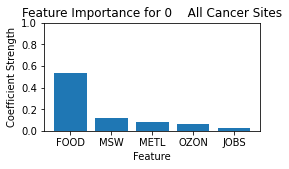

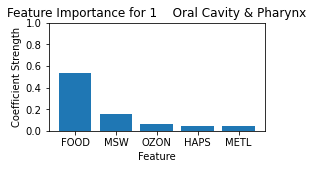

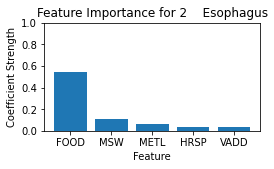

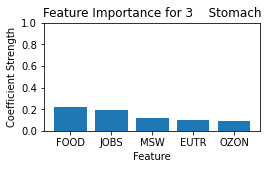

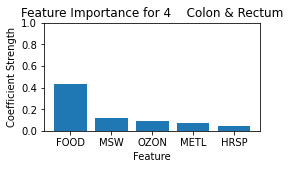

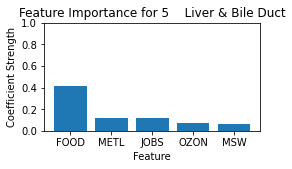

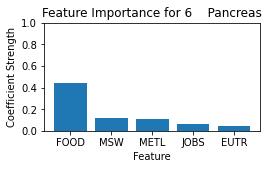

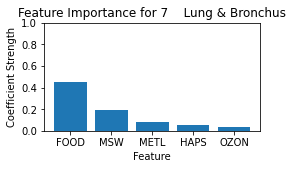

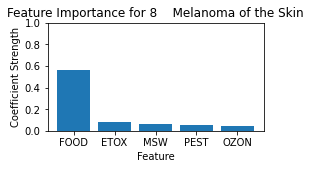

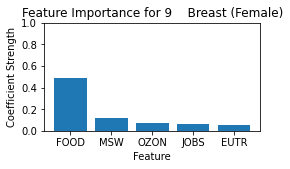

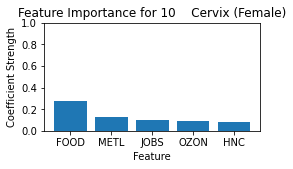

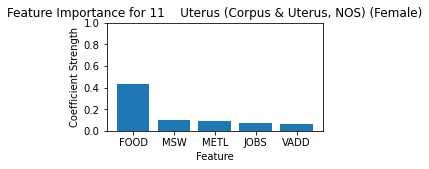

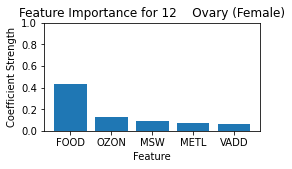

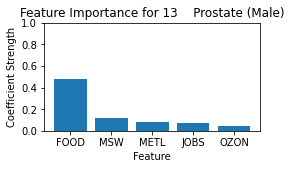

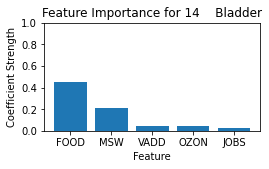

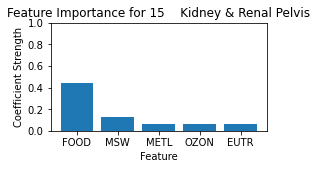

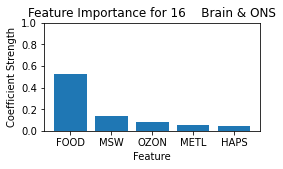

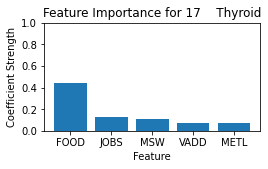

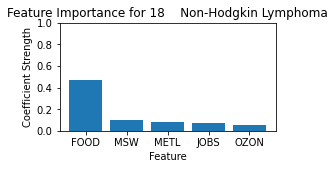

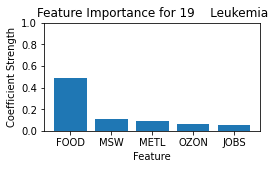

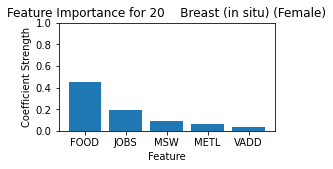

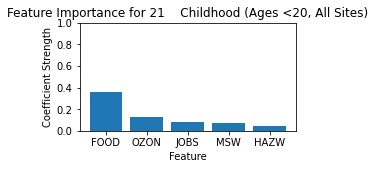

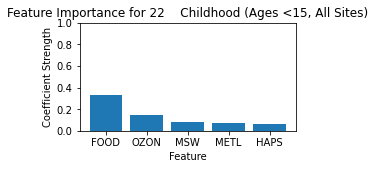

In [186]:
for i in cancerVals:
    #print cancer type number
    print("cancer type:",i)
    
    #print cancer description
    cancer=cancerTypes["cancer"]==i
    discr=cancerTypes[cancer]["cancer_description"].to_string()
    print(discr)
    
    #selecting data for the specific cancer type
    cancerData=data["cancer"]==i
    newData=data[cancerData]
    
    #splitting to test and train
    x1=newData.loc[:, 'ACID':'WATR']
    y = newData['annual_count_avg']

    X_train1, X_test1, y_train, y_test = train_test_split(x1, y,
                                                        test_size=0.3,
                                                        random_state = RSEED)

    scaler = StandardScaler()
    scaler.fit(X_train1)

    X_train = scaler.transform(X_train1)
    X_test = scaler.transform(X_test1)
    
    #Creating RandomForest Model
    print("Creating RandomForest Model and Fitting the Data")
    rf = RandomForestRegressor(n_estimators = 32,
                                      max_depth= 64, 
                                      random_state = RSEED)

    # Fit on training data
    rf.fit(X_train, y_train)
    
    #Evaluation
    r2_score=rf.score(X_test, y_test)
    print("score",r2_score)
    
    #Feature Importance
    print("Feature Importance")
    features=rf.feature_importances_
    #print(features)
    ind = np.argsort(features)[::-1]
    print("indecis:",ind)
    imp = features[ind]
    print("importances:",imp)
    cols =factors[ind]
    print("features:",cols)
    
    #plot the importance factors
    fig=plt.figure(figsize=(3,1.5))
    ax = fig.add_axes([0,0,1,1])
    ax.set_title('Feature Importance for {}'.format(discr))
    ax.bar( cols[:5].tolist(),imp[:5].tolist())
    ax.set_ylabel("Coefficient Strength")
    ax.set_xlabel("Feature")
    plt.ylim(0, 1)
    fig.show()
    print("\n")

# Logistic Regression

## Hypertuning

In [168]:
cancerData=data["cancer"]==1
newData=data[cancerData]    

#splitting to test and train
x1=newData.loc[:, 'ACID':'WATR']
y = newData['annual_count_avg']

X_train1, X_test1, y_train, y_test = train_test_split(x1, y,
                                                    test_size=0.3,
                                                    random_state = RSEED)
scaler = StandardScaler()
scaler.fit(X_train1)

X_train = scaler.transform(X_train1)
X_test = scaler.transform(X_test1)

print("XTrain",X_train.shape)
print("XTest",X_test.shape)

XTrain (2193, 24)
XTest (940, 24)


In [ ]:
# Create the model with 10 trees
#regressor = RandomForestRegressor(n_estimators = 100,
                                 # random_state = RSEED)

# Fit on training data
#regressor.fit(X_train, y_train)

parameters={'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],'max_iter': [64,100,128,200,256,400,528,1000]}
lr = LogisticRegression(random_state = RSEED)
clf = GridSearchCV(lr, parameters)
clf.fit(X_train, y_train)

In [ ]:
print(clf.best_params_)

## Logistic Regression Loop

In [172]:
for i in cancerVals:
    #print cancer type number
    print("cancer type:",i)
    
    #print cancer description
    cancer=cancerTypes["cancer"]==i
    discr=cancerTypes[cancer]["cancer_description"].to_string()
    print(discr)
    
    #selecting data for the specific cancer type
    cancerData=data["cancer"]==i
    newData=data[cancerData]
    
    #splitting to test and train
    x1=newData.loc[:, 'ACID':'WATR']
    y = newData['annual_count_avg']

    X_train1, X_test1, y_train, y_test = train_test_split(x1, y,
                                                        test_size=0.3,
                                                        random_state = RSEED)

    scaler = StandardScaler()
    scaler.fit(X_train1)

    X_train = scaler.transform(X_train1)
    X_test = scaler.transform(X_test1)
    
    #Creating Logistic Regression Model
    print("Creating Logistic Regression Model and Fitting the Data")
    lr = LogisticRegression(random_state=RSEED,solver='sag' ,max_iter=2000)

    # Fit on training data
    lr.fit(X_train, y_train)
    
    #Evaluation
    r2_score=lr.score(X_test, y_test)
    print("score",r2_score)
    print("\n")

cancer type: 1
0    All Cancer Sites
Creating Logistic Regression Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


score 0.06170212765957447


cancer type: 3
1    Oral Cavity & Pharynx
Creating Logistic Regression Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


score 0.3606382978723404


cancer type: 17
2    Esophagus
Creating Logistic Regression Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


score 0.625531914893617


cancer type: 18
3    Stomach
Creating Logistic Regression Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


score 0.5914893617021276


cancer type: 20
4    Colon & Rectum
Creating Logistic Regression Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


score 0.1148936170212766


cancer type: 35
5    Liver & Bile Duct
Creating Logistic Regression Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


score 0.5212765957446809


cancer type: 40
6    Pancreas
Creating Logistic Regression Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


score 0.37127659574468086


cancer type: 47
7    Lung & Bronchus
Creating Logistic Regression Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


score 0.08936170212765958


cancer type: 53
8    Melanoma of the Skin
Creating Logistic Regression Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


score 0.2797872340425532


cancer type: 55
9    Breast (Female)
Creating Logistic Regression Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


score 0.1


cancer type: 57
10    Cervix (Female)
Creating Logistic Regression Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


score 0.7265957446808511


cancer type: 58
11    Uterus (Corpus & Uterus, NOS) (Female)
Creating Logistic Regression Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


score 0.35638297872340424


cancer type: 61
12    Ovary (Female)
Creating Logistic Regression Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


score 0.6265957446808511


cancer type: 66
13    Prostate (Male)
Creating Logistic Regression Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


score 0.0925531914893617


cancer type: 71
14    Bladder
Creating Logistic Regression Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


score 0.251063829787234


cancer type: 72
15    Kidney & Renal Pelvis
Creating Logistic Regression Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


score 0.26276595744680853


cancer type: 76
16    Brain & ONS
Creating Logistic Regression Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


score 0.5914893617021276


cancer type: 80
17    Thyroid
Creating Logistic Regression Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


score 0.42872340425531913


cancer type: 86
18    Non-Hodgkin Lymphoma
Creating Logistic Regression Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


score 0.28085106382978725


cancer type: 90
19    Leukemia
Creating Logistic Regression Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


score 0.3468085106382979


cancer type: 400
20    Breast (in situ) (Female)
Creating Logistic Regression Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


score 0.4074468085106383


cancer type: 515
21    Childhood (Ages <20, All Sites)
Creating Logistic Regression Model and Fitting the Data


C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


score 0.6957446808510638


cancer type: 516
22    Childhood (Ages <15, All Sites)
Creating Logistic Regression Model and Fitting the Data
score 0.7617021276595745




C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


# SVR

## Hypertuning

In [ ]:
cancerData=data["cancer"]==1
newData=data[cancerData]    

#splitting to test and train
x1=newData.loc[:, 'ACID':'WATR']
y = newData['annual_count_avg']

X_train1, X_test1, y_train, y_test = train_test_split(x1, y,
                                                    test_size=0.3,
                                                    random_state = RSEED)
scaler = StandardScaler()
scaler.fit(X_train1)

X_train = scaler.transform(X_train1)
X_test = scaler.transform(X_test1)

print("XTrain",X_train.shape)
print("XTest",X_test.shape)

In [ ]:
# Create the model with 10 trees
#regressor = RandomForestRegressor(n_estimators = 100,
                                 # random_state = RSEED)

# Fit on training data
#regressor.fit(X_train, y_train)

parameters={'kernel':['linear', 'poly', 'rbf', 'sigmoid'],'C': [0.01,0.1,1],'epsilon':[0.01,0.1,1],'tol':['1e-5','1e-3','1e-1']}
LinearSVR =LinearSVR(random_state = RSEED)
clf = GridSearchCV(LinearSVR, parameters)
clf.fit(X_train, y_train)

In [ ]:
print(clf.best_params_)

## SVR Loop

In [ ]:
for i in cancerVals:
    #print cancer type number
    print("cancer type:",i)
    
    #print cancer description
    cancer=cancerTypes["cancer"]==i
    discr=cancerTypes[cancer]["cancer_description"].to_string()
    print(discr)
    
    #selecting data for the specific cancer type
    cancerData=data["cancer"]==i
    newData=data[cancerData]
    
    #splitting to test and train
    x1=newData.loc[:, 'ACID':'WATR']
    y = newData['annual_count_avg']

    X_train1, X_test1, y_train, y_test = train_test_split(x1, y,
                                                        test_size=0.3,
                                                        random_state = RSEED)

    scaler = StandardScaler()
    scaler.fit(X_train1)

    X_train = scaler.transform(X_train1)
    X_test = scaler.transform(X_test1)
    
    #Creating RandomForest Model
    print("Creating RandomForest Model and Fitting the Data")
    svr = LinearSVR(random_state=0, tol=1e-5)

    # Fit on training data
    svr.fit(X_train, y_train)
    
    #Evaluation
    r2_score=svr.score(X_test, y_test)
    print("score",r2_score)
    
    #Feature Importance
    print("Feature Importance")
    features=svr.feature_importances_
    #print(features)
    ind = np.argsort(features)[::-1]
    print("indecis:",ind)
    imp = features[ind]
    print("importances:",imp)
    cols =factors[ind]
    print("features:",cols)
    
    #plot the importance factors
    fig=plt.figure(figsize=(3,1.5))
    ax = fig.add_axes([0,0,1,1])
    ax.set_title('Feature Importance for {}'.format(discr))
    ax.bar( cols[:5].tolist(),imp[:5].tolist())
    ax.set_ylabel("Coefficient Strength")
    ax.set_xlabel("Feature")
    plt.ylim(0, 1)
    fig.show()
    print("\n")